pandas 一般用来分析表格数据

下面是下载网络数据的语句

In [111]:
from urllib.request import urlretrieve

In [112]:
urlretrieve('https://hub.jovian.ml/wp-content/uploads/2020/09/italy-covid-daywise.csv',
           'italy-covid-daywise.csv')

('italy-covid-daywise.csv', <http.client.HTTPMessage at 0x22f2cc92f10>)

In [113]:
import pandas as pd

In [114]:
covid_df = pd.read_csv('italy-covid-daywise.csv')

In [5]:
type(covid_df)

pandas.core.frame.DataFrame

In [6]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        248 non-null    object 
 1   new_cases   248 non-null    float64
 2   new_deaths  248 non-null    float64
 3   new_tests   135 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


object 数据类型就是当pandas不知道这个数据该如何处理时的数据类型

In [8]:
covid_df.describe()

,new_cases,new_deaths,new_tests
count,248.000000,248.000000,135.000000
mean,1094.818548,143.133065,31699.674074
std,1554.508002,227.105538,11622.209757
min,-148.000000,-31.000000,7841.000000
25%,123.000000,3.000000,25259.000000
50%,342.000000,17.000000,29545.000000
75%,1371.750000,175.250000,37711.000000
max,6557.000000,971.000000,95273.000000


In [9]:
covid_df.columns

Index(['date', 'new_cases', 'new_deaths', 'new_tests'], dtype='object')

In [12]:
covid_df.shape

(248, 4)

### 1.检索特定数据

dataframe具有字典的结构

优势：

一列数据通常具有相同的数据类型，这样的储存效率更高

比列表的表现形式更加紧凑

获取连续的数据更加方便（获取样本4的数据）

占用的空间少，效率高

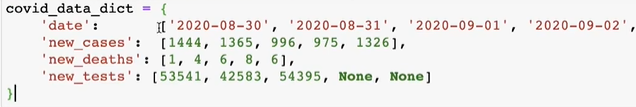

**本节用到的函数和方法：**

- covid_df['new_cases'] 提取特定列
- new_cases[243] 特定列的特定行
- covid_df.at[243, 'new_cases'] 利用at提取特定数值
- covid_df.loc[243] 用loc提取特定行
- head, tail, and sample 头尾和随机抽样
- covid_df.new_tests.first_valid_index 返回第一个有效值

In [14]:
covid_df['new_cases']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
243    1444.0
244    1365.0
245     996.0
246     975.0
247    1326.0
Name: new_cases, Length: 248, dtype: float64

数据的类是series

但是指定数据的类型与其数据值有关

In [15]:
type(covid_df['new_cases'])

pandas.core.series.Series

In [16]:
type(covid_df['new_cases'][100])

numpy.float64

可以用at检索特定数据

In [18]:
covid_df.at[100,'new_cases']

3836.0

访问特定元素，用loc,数据类型也是series

In [30]:
covid_df.loc[100]

date          2020-04-09
new_cases           3836
new_deaths           540
new_tests            NaN
Name: 100, dtype: object

In [28]:
type(covid_df.loc[100])

pandas.core.series.Series

In [23]:
covid_df.new_cases

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
243    1444.0
244    1365.0
245     996.0
246     975.0
247    1326.0
Name: new_cases, Length: 248, dtype: float64

多个列的时候应该选择的是传递列表

In [24]:
covid_df[['date','new_cases']]

,date,new_cases
0,2019-12-31,0.0
1,2020-01-01,0.0
2,2020-01-02,0.0
3,2020-01-03,0.0
4,2020-01-04,0.0
...,...,...
243,2020-08-30,1444.0
244,2020-08-31,1365.0
245,2020-09-01,996.0
246,2020-09-02,975.0


在pandas中只要更改了一个数据列，其相应的也会随之更改，不用大量复制

但是如果需要完整的副本可以有以下操作：

In [25]:
covid_df_copy = covid_df.copy()

访问前几个或者后几个数据

In [31]:
covid_df.head(5)

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN


In [32]:
covid_df.tail(5)

,date,new_cases,new_deaths,new_tests
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN
247,2020-09-03,1326.0,6.0,NaN


nan 出现的原因是数据列中没有任何数据，空白值

In [33]:
covid_df.new_tests.first_valid_index()

111

In [41]:
type(covid_df.new_tests[111])

numpy.float64

In [40]:
covid_df.new_tests[111]

7841.0

sqmple 方法：从数据行中提取随机样本

In [42]:
covid_df.sample(10)

,date,new_cases,new_deaths,new_tests
85,2020-03-25,5249.0,743.0,NaN
246,2020-09-02,975.0,8.0,NaN
125,2020-05-04,1389.0,174.0,22999.0
87,2020-03-27,6153.0,660.0,NaN
191,2020-07-09,193.0,15.0,29947.0
239,2020-08-26,876.0,4.0,58054.0
20,2020-01-20,0.0,0.0,NaN
15,2020-01-15,0.0,0.0,NaN
72,2020-03-12,2313.0,196.0,NaN
14,2020-01-14,0.0,0.0,NaN


pandas 中随机样本的抽取会保持原有的索引（即来源）

这比numpy好，numpy不知道来源

### 2.分析pandas数据 

**本节用到的函数和方法**

- .sum() 求和
- covid_df[covid_df.new_cases > 1000] 提取特定值的索引
- df['pos_rate'] = df.new_cases/df.new_tests 创建新的列
- covid_df.drop('positive_rate') 丢弃列
- sort_values 排序
- covid_df.at[172, 'new_cases'] = 更新数值

在计算加法时，nan值总是被忽略

In [44]:
total_cases = covid_df.new_cases.sum()
total_deaths = covid_df.new_deaths.sum()
death_rate = total_deaths/total_cases

#### 2.2 数据查询和排序 

In [47]:
high = covid_df.new_cases >1000

In [48]:
high

0      False
1      False
2      False
3      False
4      False
       ...  
243     True
244     True
245    False
246    False
247     True
Name: new_cases, Length: 248, dtype: bool

In [49]:
high.sum()

72

索引的新用法

In [50]:
covid_df[high]

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


增大显示的数据行的数目的方法：

只影响一次的输出，不影响后面的数据

In [56]:
from IPython.display import display
with pd.option_context('display.max_row',100):
    display(covid_df[covid_df.new_cases > 1000])

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
74,2020-03-14,2547.0,252.0,NaN
75,2020-03-15,3497.0,173.0,NaN
76,2020-03-16,2823.0,370.0,NaN
77,2020-03-17,4000.0,347.0,NaN
78,2020-03-18,3526.0,347.0,NaN


In [57]:
covid_df[high]

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


In [60]:
high_ratio_df = covid_df[covid_df.new_cases / covid_df.new_tests > 0.05]

In [61]:
high_ratio_df

,date,new_cases,new_deaths,new_tests
111,2020-04-20,3047.0,433.0,7841.0
112,2020-04-21,2256.0,454.0,28095.0
113,2020-04-22,2729.0,534.0,44248.0
114,2020-04-23,3370.0,437.0,37083.0
116,2020-04-25,3021.0,420.0,38676.0
117,2020-04-26,2357.0,415.0,24113.0
118,2020-04-27,2324.0,260.0,26678.0
120,2020-04-29,2091.0,382.0,38589.0
121,2020-04-30,2086.0,323.0,41441.0
123,2020-05-02,1965.0,269.0,31231.0


In [62]:
covid_df['positive_rate'] =  covid_df.new_cases / covid_df.new_tests

In [63]:
covid_df

,date,new_cases,new_deaths,new_tests,positive_rate
0,2019-12-31,0.0,0.0,NaN,NaN
1,2020-01-01,0.0,0.0,NaN,NaN
2,2020-01-02,0.0,0.0,NaN,NaN
3,2020-01-03,0.0,0.0,NaN,NaN
4,2020-01-04,0.0,0.0,NaN,NaN
...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,0.026970
244,2020-08-31,1365.0,4.0,42583.0,0.032055
245,2020-09-01,996.0,6.0,54395.0,0.018311
246,2020-09-02,975.0,8.0,NaN,NaN


使用drop 删除变量，可以一次删除多个

In [65]:
covid_df.drop(columns = ['positive_rate'],inplace = True)

利用.sort_values()进行排序操作

ascending 为真表示的的是递增的排列

*显示帮助，可以在键入函数以后，按住shift+tab*

*或者直接在后面加问号，比较详细*

In [68]:
covid_df.sort_values('new_cases',ascending = True).head(10)

,date,new_cases,new_deaths,new_tests
172,2020-06-20,-148.0,47.0,29875.0
0,2019-12-31,0.0,0.0,NaN
29,2020-01-29,0.0,0.0,NaN
30,2020-01-30,0.0,0.0,NaN
32,2020-02-01,0.0,0.0,NaN
33,2020-02-02,0.0,0.0,NaN
34,2020-02-03,0.0,0.0,NaN
36,2020-02-05,0.0,0.0,NaN
37,2020-02-06,0.0,0.0,NaN
38,2020-02-07,0.0,0.0,NaN


这个数据有个错误，就用一般的处理缺失值或者错误值的方法处理好了

用0填充，或者均值，或者拟合一个分布之类的

这里就用附近值的均值替代了

In [69]:
covid_df.at[172, 'new_cases'] = (covid_df.at[171, 'new_cases'] + covid_df.at[173, 'new_cases'])/2

In [70]:
covid_df.sort_values('new_cases',ascending = True).head(10)

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
28,2020-01-28,0.0,0.0,NaN
29,2020-01-29,0.0,0.0,NaN
30,2020-01-30,0.0,0.0,NaN
32,2020-02-01,0.0,0.0,NaN
33,2020-02-02,0.0,0.0,NaN
35,2020-02-04,0.0,0.0,NaN
36,2020-02-05,0.0,0.0,NaN
37,2020-02-06,0.0,0.0,NaN
38,2020-02-07,0.0,0.0,NaN


### 3.时间数据 

**本节用到的函数和方法**

- date 时间数据的转化
- year month day weekday 特定时间数据的提取
- groupby cumsum 分组和累计求和

In [71]:
covid_df.date

0      2019-12-31
1      2020-01-01
2      2020-01-02
3      2020-01-03
4      2020-01-04
          ...    
243    2020-08-30
244    2020-08-31
245    2020-09-01
246    2020-09-02
247    2020-09-03
Name: date, Length: 248, dtype: object

In [74]:
covid_df.date = pd.to_datetime(covid_df.date)

In [75]:
covid_df.date

0     2019-12-31
1     2020-01-01
2     2020-01-02
3     2020-01-03
4     2020-01-04
         ...    
243   2020-08-30
244   2020-08-31
245   2020-09-01
246   2020-09-02
247   2020-09-03
Name: date, Length: 248, dtype: datetime64[ns]

In [76]:
covid_df['year'] = pd.DatetimeIndex(covid_df.date).year
covid_df['month'] = pd.DatetimeIndex(covid_df.date).month
covid_df['day'] = pd.DatetimeIndex(covid_df.date).day
#周一是0
covid_df['weekday'] = pd.DatetimeIndex(covid_df.date).weekday

In [77]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5
...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2


In [79]:
covid_df_may = covid_df[covid_df.month == 5]

In [81]:
covid_df_may_newmartrix = covid_df_may[['new_cases','new_deaths','new_tests']]

In [82]:
covid_df_may_newmartrix.sum()

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

In [83]:
covid_df[covid_df.month == 5][['new_cases','new_deaths','new_tests']].sum()

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

计算均值也可以用类似的方法 .mean

#### 3.1 分组和累计求和 

运用groupby进行分组，利用cumsum进行累计求和

In [85]:
covid_month_df = covid_df.groupby('month')[['new_cases','new_deaths']]

In [88]:
covid_month_df.mean()

,new_cases,new_deaths
month,,
1,0.096774,0.000000
2,30.517241,0.724138
3,3253.258065,373.225806
4,3395.066667,536.366667
5,937.838710,182.516129
6,273.916667,46.800000
7,216.838710,12.516129
8,679.354839,11.129032
9,1099.000000,6.666667


covid_month_df显示的是一个中间状态，也就是数据是如何显示和提取的，如果要显示数据还是要进行数据预算

In [91]:
covid_df['total_cases'] = covid_df.new_cases.cumsum()

In [92]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0
...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5


### 4. 与其他数据集合并

**本节用到的函数和方法**

- merge 合并表格
- to_csv 返回结果到csv文件

In [93]:
urlretrieve('https://gist.githubusercontent.com/aakashns/8684589ef4f266116cdce023377fc9c8/raw/99ce3826b2a9d1e6d0bde7e9e559fc8b6e9ac88b/locations.csv', 
            'locations.csv')

('locations.csv', <http.client.HTTPMessage at 0x22f2bb67220>)

In [94]:
locations_df = pd.read_csv('locations.csv')

In [95]:
locations_df

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,Afghanistan,Asia,3.892834e+07,64.83,0.500,1803.987
1,Albania,Europe,2.877800e+06,78.57,2.890,11803.431
2,Algeria,Africa,4.385104e+07,76.88,1.900,13913.839
3,Andorra,Europe,7.726500e+04,83.73,NaN,NaN
4,Angola,Africa,3.286627e+07,61.15,NaN,5819.495
...,...,...,...,...,...,...
207,Yemen,Asia,2.982597e+07,66.12,0.700,1479.147
208,Zambia,Africa,1.838396e+07,63.89,2.000,3689.251
209,Zimbabwe,Africa,1.486293e+07,61.49,1.700,1899.775
210,World,NaN,7.794799e+09,72.58,2.705,15469.207


In [98]:
locations_df[locations_df['location'] == 'Italy']

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
97,Italy,Europe,60461828.0,83.51,3.18,35220.084


In [99]:
covid_df['location'] = 'Italy'

In [100]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,location
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,Italy
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,Italy
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,Italy
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,Italy
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,Italy
...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,Italy
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,Italy
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,Italy
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5,Italy


merge 合并表格，且表格合并的过程中至少需要一个公共列

In [102]:
merge_df = covid_df.merge(locations_df,on = 'location')

In [103]:
merge_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,Italy,Europe,60461828.0,83.51,3.18,35220.084
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,Italy,Europe,60461828.0,83.51,3.18,35220.084
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,Italy,Europe,60461828.0,83.51,3.18,35220.084
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5,Italy,Europe,60461828.0,83.51,3.18,35220.084


还可以用.to_csv()将结果返回到数据文件中，返回的数据将会覆盖原来的数据

index = None 就是不需要pandas附带的索引

In [104]:
merge_df.to_csv('merge_df.csv',index = None)

###  5. 绘图

**本节用到的函数和方法**

- .plot() 里面有很多选项，title，kind等等

绘图有很多其他的库，这里就是简短的介绍一下，pandas有一些方便的库


<AxesSubplot:>

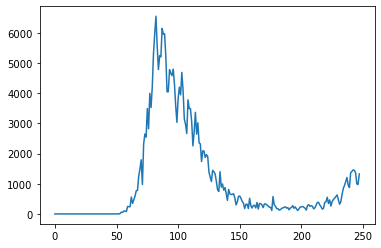

In [105]:
covid_df.new_cases.plot()

但是这个图的横坐标是索引，看起来不好看，改一下索引

In [115]:
covid_df.set_index('date',inplace = True)
#inplace是False就是不创建新对象，只在这里修改数据

<AxesSubplot:xlabel='date'>

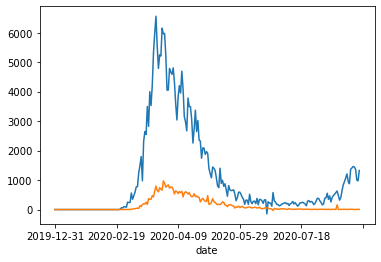

In [117]:
covid_df.new_cases.plot()
covid_df.new_deaths.plot()

### 6. 作业 

In [1]:
from urllib.request import urlretrieve

urlretrieve('https://hub.jovian.ml/wp-content/uploads/2020/09/countries.csv', 
            'countries.csv')

('countries.csv', <http.client.HTTPMessage at 0x279b6024d00>)

In [3]:
import pandas as pd

In [4]:
countries_df = pd.read_csv('countries.csv')

In [5]:
countries_df

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,Afghanistan,Asia,38928341.0,64.83,0.50,1803.987
1,Albania,Europe,2877800.0,78.57,2.89,11803.431
2,Algeria,Africa,43851043.0,76.88,1.90,13913.839
3,Andorra,Europe,77265.0,83.73,NaN,NaN
4,Angola,Africa,32866268.0,61.15,NaN,5819.495
...,...,...,...,...,...,...
205,Vietnam,Asia,97338583.0,75.40,2.60,6171.884
206,Western Sahara,Africa,597330.0,70.26,NaN,NaN
207,Yemen,Asia,29825968.0,66.12,0.70,1479.147
208,Zambia,Africa,18383956.0,63.89,2.00,3689.251


Q1: How many countries does the dataframe contain?

In [7]:
'''
根本没有重复值，直接输出shape
'''
num_countries = countries_df.shape[0]
print('有{}个国家'.format(num_countries))

有210个国家


Q2: Retrieve a list of continents from the dataframe?

In [8]:
continents = countries_df.continent.unique()

In [9]:
continents

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

Q3: What is the total population of all the countries listed in this dataset?


In [10]:
print('总共有{}人'.format(countries_df.population.sum()))

总共有7757980095.0人


Q4: (Optional) What is the overall life expectancy across in the world?

In [17]:
countries_df['total_life'] = countries_df['population']*countries_df['life_expectancy']
print('全世界平均寿命是{}年'.format(countries_df['total_life'].sum()/countries_df.population.sum()))

全世界平均寿命是72.72165193409664年


Q5: Create a dataframe containing 10 countries with the highest population.

In [18]:
most_populous_df = countries_df.sort_values('population',ascending = False).head(10)

In [19]:
most_populous_df

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,total_life
41,China,Asia,1.439324e+09,76.91,4.34,15308.712,1.106984e+11
90,India,Asia,1.380004e+09,69.66,0.53,6426.674,9.613111e+10
199,United States,North America,3.310026e+08,78.86,2.77,54225.446,2.610287e+10
91,Indonesia,Asia,2.735236e+08,71.72,1.04,11188.744,1.961711e+10
145,Pakistan,Asia,2.208923e+08,67.27,0.60,5034.708,1.485943e+10
27,Brazil,South America,2.125594e+08,75.88,2.20,14103.452,1.612901e+10
141,Nigeria,Africa,2.061396e+08,54.69,NaN,5338.454,1.127377e+10
15,Bangladesh,Asia,1.646894e+08,72.59,0.80,3523.984,1.195480e+10
157,Russia,Europe,1.459345e+08,72.58,8.05,24765.954,1.059192e+10
125,Mexico,North America,1.289328e+08,75.05,1.38,17336.469,9.676403e+09


Q6: Add a new column in countries_df to record the overall GDP per country (product of population & per capita GDP).

In [20]:
countries_df['gdp'] = countries_df['population']*countries_df['gdp_per_capita']

In [21]:
countries_df

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,total_life,gdp
0,Afghanistan,Asia,38928341.0,64.83,0.50,1803.987,2.523724e+09,7.022622e+10
1,Albania,Europe,2877800.0,78.57,2.89,11803.431,2.261087e+08,3.396791e+10
2,Algeria,Africa,43851043.0,76.88,1.90,13913.839,3.371268e+09,6.101364e+11
3,Andorra,Europe,77265.0,83.73,NaN,NaN,6.469398e+06,NaN
4,Angola,Africa,32866268.0,61.15,NaN,5819.495,2.009772e+09,1.912651e+11
...,...,...,...,...,...,...,...,...
205,Vietnam,Asia,97338583.0,75.40,2.60,6171.884,7.339329e+09,6.007624e+11
206,Western Sahara,Africa,597330.0,70.26,NaN,NaN,4.196841e+07,NaN
207,Yemen,Asia,29825968.0,66.12,0.70,1479.147,1.972093e+09,4.411699e+10
208,Zambia,Africa,18383956.0,63.89,2.00,3689.251,1.174551e+09,6.782303e+10


Q7: (Optional) Create a dataframe containing 10 countries with the lowest GDP per capita, among the counties with population greater than 100 million.

In [23]:
population_high = countries_df[countries_df['population'] > 100000000]

least_gdp_df = population_high.sort_values('gdp',ascending = False).tail(10)

In [26]:
least_gdp_df

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,total_life,gdp
157,Russia,Europe,145934460.0,72.58,8.05,24765.954,1.059192e+10,3.614206e+12
91,Indonesia,Asia,273523621.0,71.72,1.04,11188.744,1.961711e+10,3.060386e+12
27,Brazil,South America,212559409.0,75.88,2.20,14103.452,1.612901e+10,2.997821e+12
125,Mexico,North America,128932753.0,75.05,1.38,17336.469,9.676403e+09,2.235239e+12
145,Pakistan,Asia,220892331.0,67.27,0.60,5034.708,1.485943e+10,1.112128e+12
141,Nigeria,Africa,206139587.0,54.69,NaN,5338.454,1.127377e+10,1.100467e+12
58,Egypt,Africa,102334403.0,71.99,1.60,10550.206,7.367054e+09,1.079649e+12
151,Philippines,Asia,109581085.0,71.23,1.00,7599.188,7.805461e+09,8.327273e+11
15,Bangladesh,Asia,164689383.0,72.59,0.80,3523.984,1.195480e+10,5.803628e+11
63,Ethiopia,Africa,114963583.0,66.60,0.30,1729.927,7.656575e+09,1.988786e+11


Q8: Create a data frame that counts the number countries in each continent?

In [28]:
country_counts_df = countries_df.location.groupby(countries_df.continent).count()

In [29]:
country_counts_df

continent
Africa           55
Asia             47
Europe           51
North America    36
Oceania           8
South America    13
Name: location, dtype: int64

Q9: Create a data frame showing the total population of each continent.

In [30]:
continent_populations_df = countries_df.population.groupby(countries_df.continent).sum()

In [31]:
continent_populations_df

continent
Africa           1.339424e+09
Asia             4.607388e+09
Europe           7.485062e+08
North America    5.912425e+08
Oceania          4.095832e+07
South America    4.304611e+08
Name: population, dtype: float64

Q10: Count the number of countries for which the total_tests data is missing.

In [35]:
urlretrieve('https://hub.jovian.ml/wp-content/uploads/2020/09/covid-countries-data.csv', 
            'covid-countries-data.csv')

('covid-countries-data.csv', <http.client.HTTPMessage at 0x279b8180880>)

In [36]:
covid_data_df = pd.read_csv('covid-countries-data.csv')

In [37]:
covid_data_df

,location,total_cases,total_deaths,total_tests
0,Afghanistan,38243.0,1409.0,NaN
1,Albania,9728.0,296.0,NaN
2,Algeria,45158.0,1525.0,NaN
3,Andorra,1199.0,53.0,NaN
4,Angola,2729.0,109.0,NaN
...,...,...,...,...
207,Western Sahara,766.0,1.0,NaN
208,World,26059065.0,863535.0,NaN
209,Yemen,1976.0,571.0,NaN
210,Zambia,12415.0,292.0,NaN


In [39]:
print("The data for total tests is missing for {} countries.".format(int(covid_data_df.total_tests.isna().count())))

The data for total tests is missing for 212 countries.


In [41]:
covid_data_df.total_tests.isna().count()

212

Q10: Merge countries_df with covid_data_df on the location column

In [46]:
combined_df = covid_data_df.merge(countries_df,on = 'location')

In [47]:
combined_df 

,location,total_cases,total_deaths,total_tests,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,total_life,gdp
0,Afghanistan,38243.0,1409.0,NaN,Asia,38928341.0,64.83,0.50,1803.987,2.523724e+09,7.022622e+10
1,Albania,9728.0,296.0,NaN,Europe,2877800.0,78.57,2.89,11803.431,2.261087e+08,3.396791e+10
2,Algeria,45158.0,1525.0,NaN,Africa,43851043.0,76.88,1.90,13913.839,3.371268e+09,6.101364e+11
3,Andorra,1199.0,53.0,NaN,Europe,77265.0,83.73,NaN,NaN,6.469398e+06,NaN
4,Angola,2729.0,109.0,NaN,Africa,32866268.0,61.15,NaN,5819.495,2.009772e+09,1.912651e+11
...,...,...,...,...,...,...,...,...,...,...,...
205,Vietnam,1046.0,35.0,261004.0,Asia,97338583.0,75.40,2.60,6171.884,7.339329e+09,6.007624e+11
206,Western Sahara,766.0,1.0,NaN,Africa,597330.0,70.26,NaN,NaN,4.196841e+07,NaN
207,Yemen,1976.0,571.0,NaN,Asia,29825968.0,66.12,0.70,1479.147,1.972093e+09,4.411699e+10
208,Zambia,12415.0,292.0,NaN,Africa,18383956.0,63.89,2.00,3689.251,1.174551e+09,6.782303e+10


Q11: Add columns tests_per_million, cases_per_million and deaths_per_million into combined_df

In [49]:
combined_df['tests_per_million'] = combined_df['total_tests'] * 1e6 / combined_df['population']
combined_df['cases_per_million'] = combined_df['total_cases'] * 1e6 / combined_df['population']
combined_df['deaths_per_million'] = combined_df['total_deaths'] * 1e6 / combined_df['population']
combined_df

,location,total_cases,total_deaths,total_tests,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,total_life,gdp,tests_per_million,cases_per_million,deaths_per_million
0,Afghanistan,38243.0,1409.0,NaN,Asia,38928341.0,64.83,0.50,1803.987,2.523724e+09,7.022622e+10,NaN,982.394806,36.194710
1,Albania,9728.0,296.0,NaN,Europe,2877800.0,78.57,2.89,11803.431,2.261087e+08,3.396791e+10,NaN,3380.359997,102.856349
2,Algeria,45158.0,1525.0,NaN,Africa,43851043.0,76.88,1.90,13913.839,3.371268e+09,6.101364e+11,NaN,1029.804468,34.776824
3,Andorra,1199.0,53.0,NaN,Europe,77265.0,83.73,NaN,NaN,6.469398e+06,NaN,NaN,15518.022390,685.950948
4,Angola,2729.0,109.0,NaN,Africa,32866268.0,61.15,NaN,5819.495,2.009772e+09,1.912651e+11,NaN,83.033462,3.316470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,Vietnam,1046.0,35.0,261004.0,Asia,97338583.0,75.40,2.60,6171.884,7.339329e+09,6.007624e+11,2681.403324,10.745996,0.359570
206,Western Sahara,766.0,1.0,NaN,Africa,597330.0,70.26,NaN,NaN,4.196841e+07,NaN,NaN,1282.373228,1.674116
207,Yemen,1976.0,571.0,NaN,Asia,29825968.0,66.12,0.70,1479.147,1.972093e+09,4.411699e+10,NaN,66.250993,19.144391
208,Zambia,12415.0,292.0,NaN,Africa,18383956.0,63.89,2.00,3689.251,1.174551e+09,6.782303e+10,NaN,675.317108,15.883415


Q12: Create a dataframe with 10 countires that have highest number of tests per million people.

In [66]:
highest_tests_df = combined_df.sort_values('tests_per_million',ascending = False).tail(10)

In [67]:
highest_tests_df.location

189                           Timor
191             Trinidad and Tobago
194        Turks and Caicos Islands
200    United States Virgin Islands
202                      Uzbekistan
203                         Vatican
204                       Venezuela
206                  Western Sahara
207                           Yemen
208                          Zambia
Name: location, dtype: object

Q13: Create a dataframe with 10 countires that have highest number of positive cases per million people.

In [68]:
highest_cases_df  = combined_df.sort_values('cases_per_million',ascending = False).tail(10)

In [70]:
highest_cases_df .location

32       Burundi
66          Fiji
185       Taiwan
189        Timor
133      Myanmar
33      Cambodia
205      Vietnam
187     Tanzania
107         Laos
87     Hong Kong
Name: location, dtype: object

Q14: Create a dataframe with 10 countires that have highest number of deaths cases per million people?



In [71]:
highest_deaths_df  = combined_df.sort_values('deaths_per_million',ascending = False).tail(10)

In [76]:
highest_deaths_df

,location,total_cases,total_deaths,total_tests,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,total_life,gdp,tests_per_million,cases_per_million,deaths_per_million
78,Grenada,24.0,0.0,NaN,North America,112519.0,72.40,3.7,13593.877,8.146376e+06,1.529569e+09,NaN,213.297310,0.0
22,Bhutan,227.0,0.0,NaN,Asia,771612.0,71.78,1.7,8708.597,5.538631e+07,6.719658e+09,NaN,294.189308,0.0
65,Falkland Islands,13.0,0.0,NaN,South America,3483.0,81.44,NaN,NaN,2.836555e+05,NaN,NaN,3732.414585,0.0
77,Greenland,14.0,0.0,NaN,North America,56772.0,71.70,NaN,NaN,4.070552e+06,NaN,NaN,246.600437,0.0
75,Gibraltar,295.0,0.0,NaN,Europe,33691.0,79.93,NaN,NaN,2.692922e+06,NaN,NaN,8756.047609,0.0
64,Faeroe Islands,411.0,0.0,NaN,Europe,48865.0,80.67,NaN,NaN,3.941940e+06,NaN,NaN,8410.928067,0.0
107,Laos,22.0,0.0,NaN,Asia,7275556.0,67.92,1.5,6397.360,4.941558e+08,4.654435e+10,NaN,3.023824,0.0
128,Mongolia,306.0,0.0,NaN,Asia,3278292.0,69.87,7.0,11840.846,2.290543e+08,3.881775e+10,NaN,93.341289,0.0
33,Cambodia,274.0,0.0,NaN,Asia,16718971.0,69.82,0.8,3645.070,1.167319e+09,6.094182e+10,NaN,16.388568,0.0
87,Hong Kong,NaN,NaN,780410.0,Asia,7496988.0,84.86,NaN,56054.920,6.361944e+08,4.202431e+11,104096.47181,NaN,NaN


(Optional) Q15: Count number of countries that feature in both the lists of "highest number of tests per million" and "highest number of cases per million".

In [79]:
high_combine_df = highest_cases_df.merge(highest_deaths_df,on = 'location')

In [80]:
high_combine_df

,location,total_cases_x,total_deaths_x,total_tests_x,continent_x,population_x,life_expectancy_x,hospital_beds_per_thousand_x,gdp_per_capita_x,total_life_x,...,continent_y,population_y,life_expectancy_y,hospital_beds_per_thousand_y,gdp_per_capita_y,total_life_y,gdp_y,tests_per_million_y,cases_per_million_y,deaths_per_million_y
0,Cambodia,274.0,0.0,NaN,Asia,16718971.0,69.82,0.8,3645.07,1.167319e+09,...,Asia,16718971.0,69.82,0.8,3645.07,1.167319e+09,6.094182e+10,NaN,16.388568,0.0
1,Laos,22.0,0.0,NaN,Asia,7275556.0,67.92,1.5,6397.36,4.941558e+08,...,Asia,7275556.0,67.92,1.5,6397.36,4.941558e+08,4.654435e+10,NaN,3.023824,0.0
2,Hong Kong,NaN,NaN,780410.0,Asia,7496988.0,84.86,NaN,56054.92,6.361944e+08,...,Asia,7496988.0,84.86,NaN,56054.92,6.361944e+08,4.202431e+11,104096.47181,NaN,NaN


(Optional) Q17: Count number of countries that feature in both the lists "20 countries with lowest GDP per capita" and "20 countries with the lowest number of hospital beds per thousand population". Only consider countries with a population higher than 10 million while creating the list.

In [81]:
'''
眼睛花了，不想做了，按顺序做一下就行
'''

'\n眼睛花了，不想做了，按顺序做一下就行\n'